In [1]:
import pandas as pd
import seaborn as sns
from scripts.data_processing import process_data
import os
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
df_met = process_data()

In [3]:
df_met['time'] = df_met['time'].apply(lambda x: int(x/100))

In [4]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
path = os.path.join(base_dir, 'data/clean/demand_curve.csv')
df_demand = pd.read_csv(path)

In [5]:
df_met_grouped = df_met.copy().groupby(by = ['date', 'time']).mean().reset_index()

In [6]:
df_demand['date'] = pd.to_datetime(df_demand['date'])
df_demand['time'] = pd.to_datetime(df_demand['time'], format = 'mixed')
df_demand['time'] = df_demand['time'].apply(lambda x: x.time())

In [7]:
df_met_grouped['date'] = pd.to_datetime(df_met_grouped['date'])
df_met_grouped['time'] = pd.to_datetime(df_met_grouped['time'], unit = 'h')
df_met_grouped['time'] = df_met_grouped['time'].apply(lambda x: x.time())

In [8]:
df = df_met_grouped.merge(df_demand, on=['date', 'time'])

In [22]:
df.columns

Index(['energy_demand', 'date', 'precipitation_total',
       'atmospheric_pressure_station_level', 'atmospheric_pressure_sea_level',
       'atmospheric_pressure_max_prev_hour',
       'atmospheric_pressure_min_prev_hour', 'global_radiation',
       'station_CPU_temp', 'air_temp_dry_bulb', 'dew_point_temp',
       'max_temp_prev_hour', 'min_temp_prev_hour',
       'max_dew_point_temp_prev_hour', 'min_dew_point_temp_prev_hour',
       'station_battery_voltage', 'max_relative_humidity_prev_hour',
       'min_relative_humidity_prev_hour', 'relative_humidity',
       'wind_direction', 'wind_max_gust', 'wind_speed', 'is_weekend'],
      dtype='object')

In [9]:
df['date'] = df.apply(lambda x: x['date'].replace(hour=x['time'].hour, minute = x['time'].minute, second = x['time'].second), axis=1)
df = df.drop(columns = 'time')

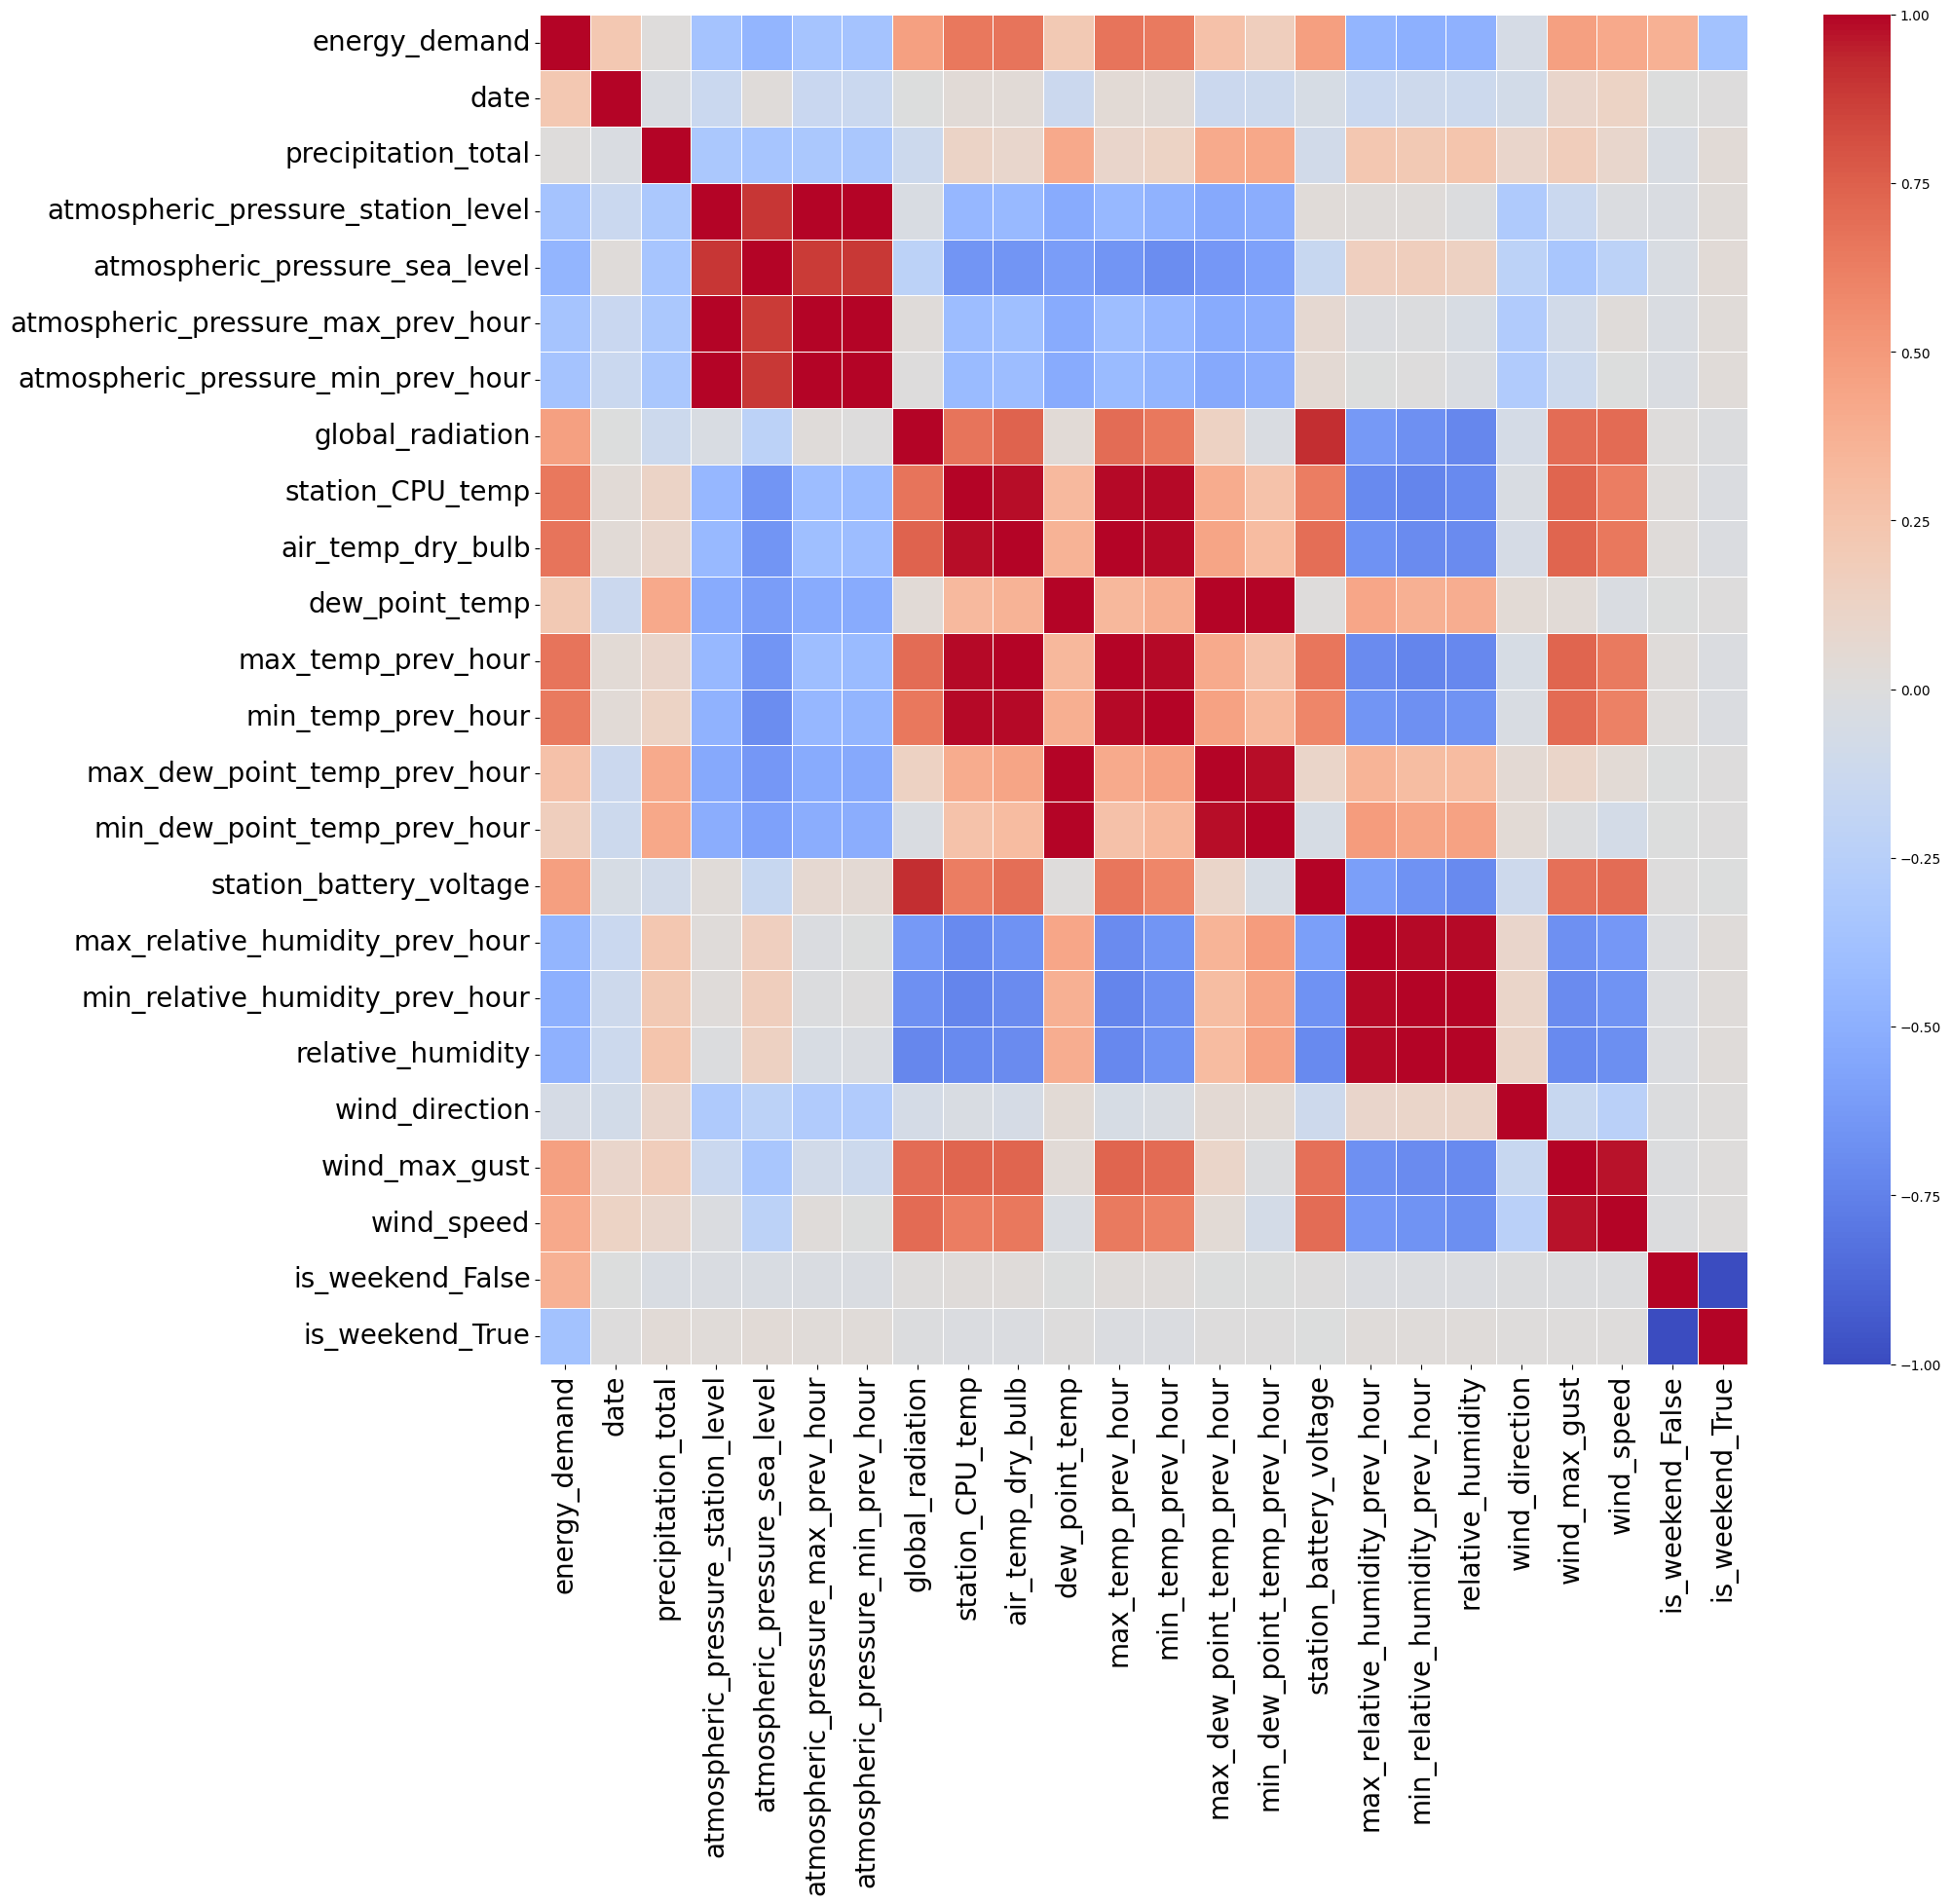

In [25]:
cols = df.columns.tolist()

cols.insert(0, cols.pop(cols.index('energy_demand')))
df = df[cols]

dummied = pd.get_dummies(df.copy(), columns = ['is_weekend'])
correlation = dummied.corr()
plt.figure(figsize=(20, 18))
matrix = sns.heatmap(correlation, cmap='coolwarm', annot=False, linewidths = 0.5)
plt.title('Correlation matrix after feature selection', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
figure = matrix.get_figure()
figure.savefig('../figures/corr_matrix.png', dpi = 400, bbox_inches='tight')
plt.show()

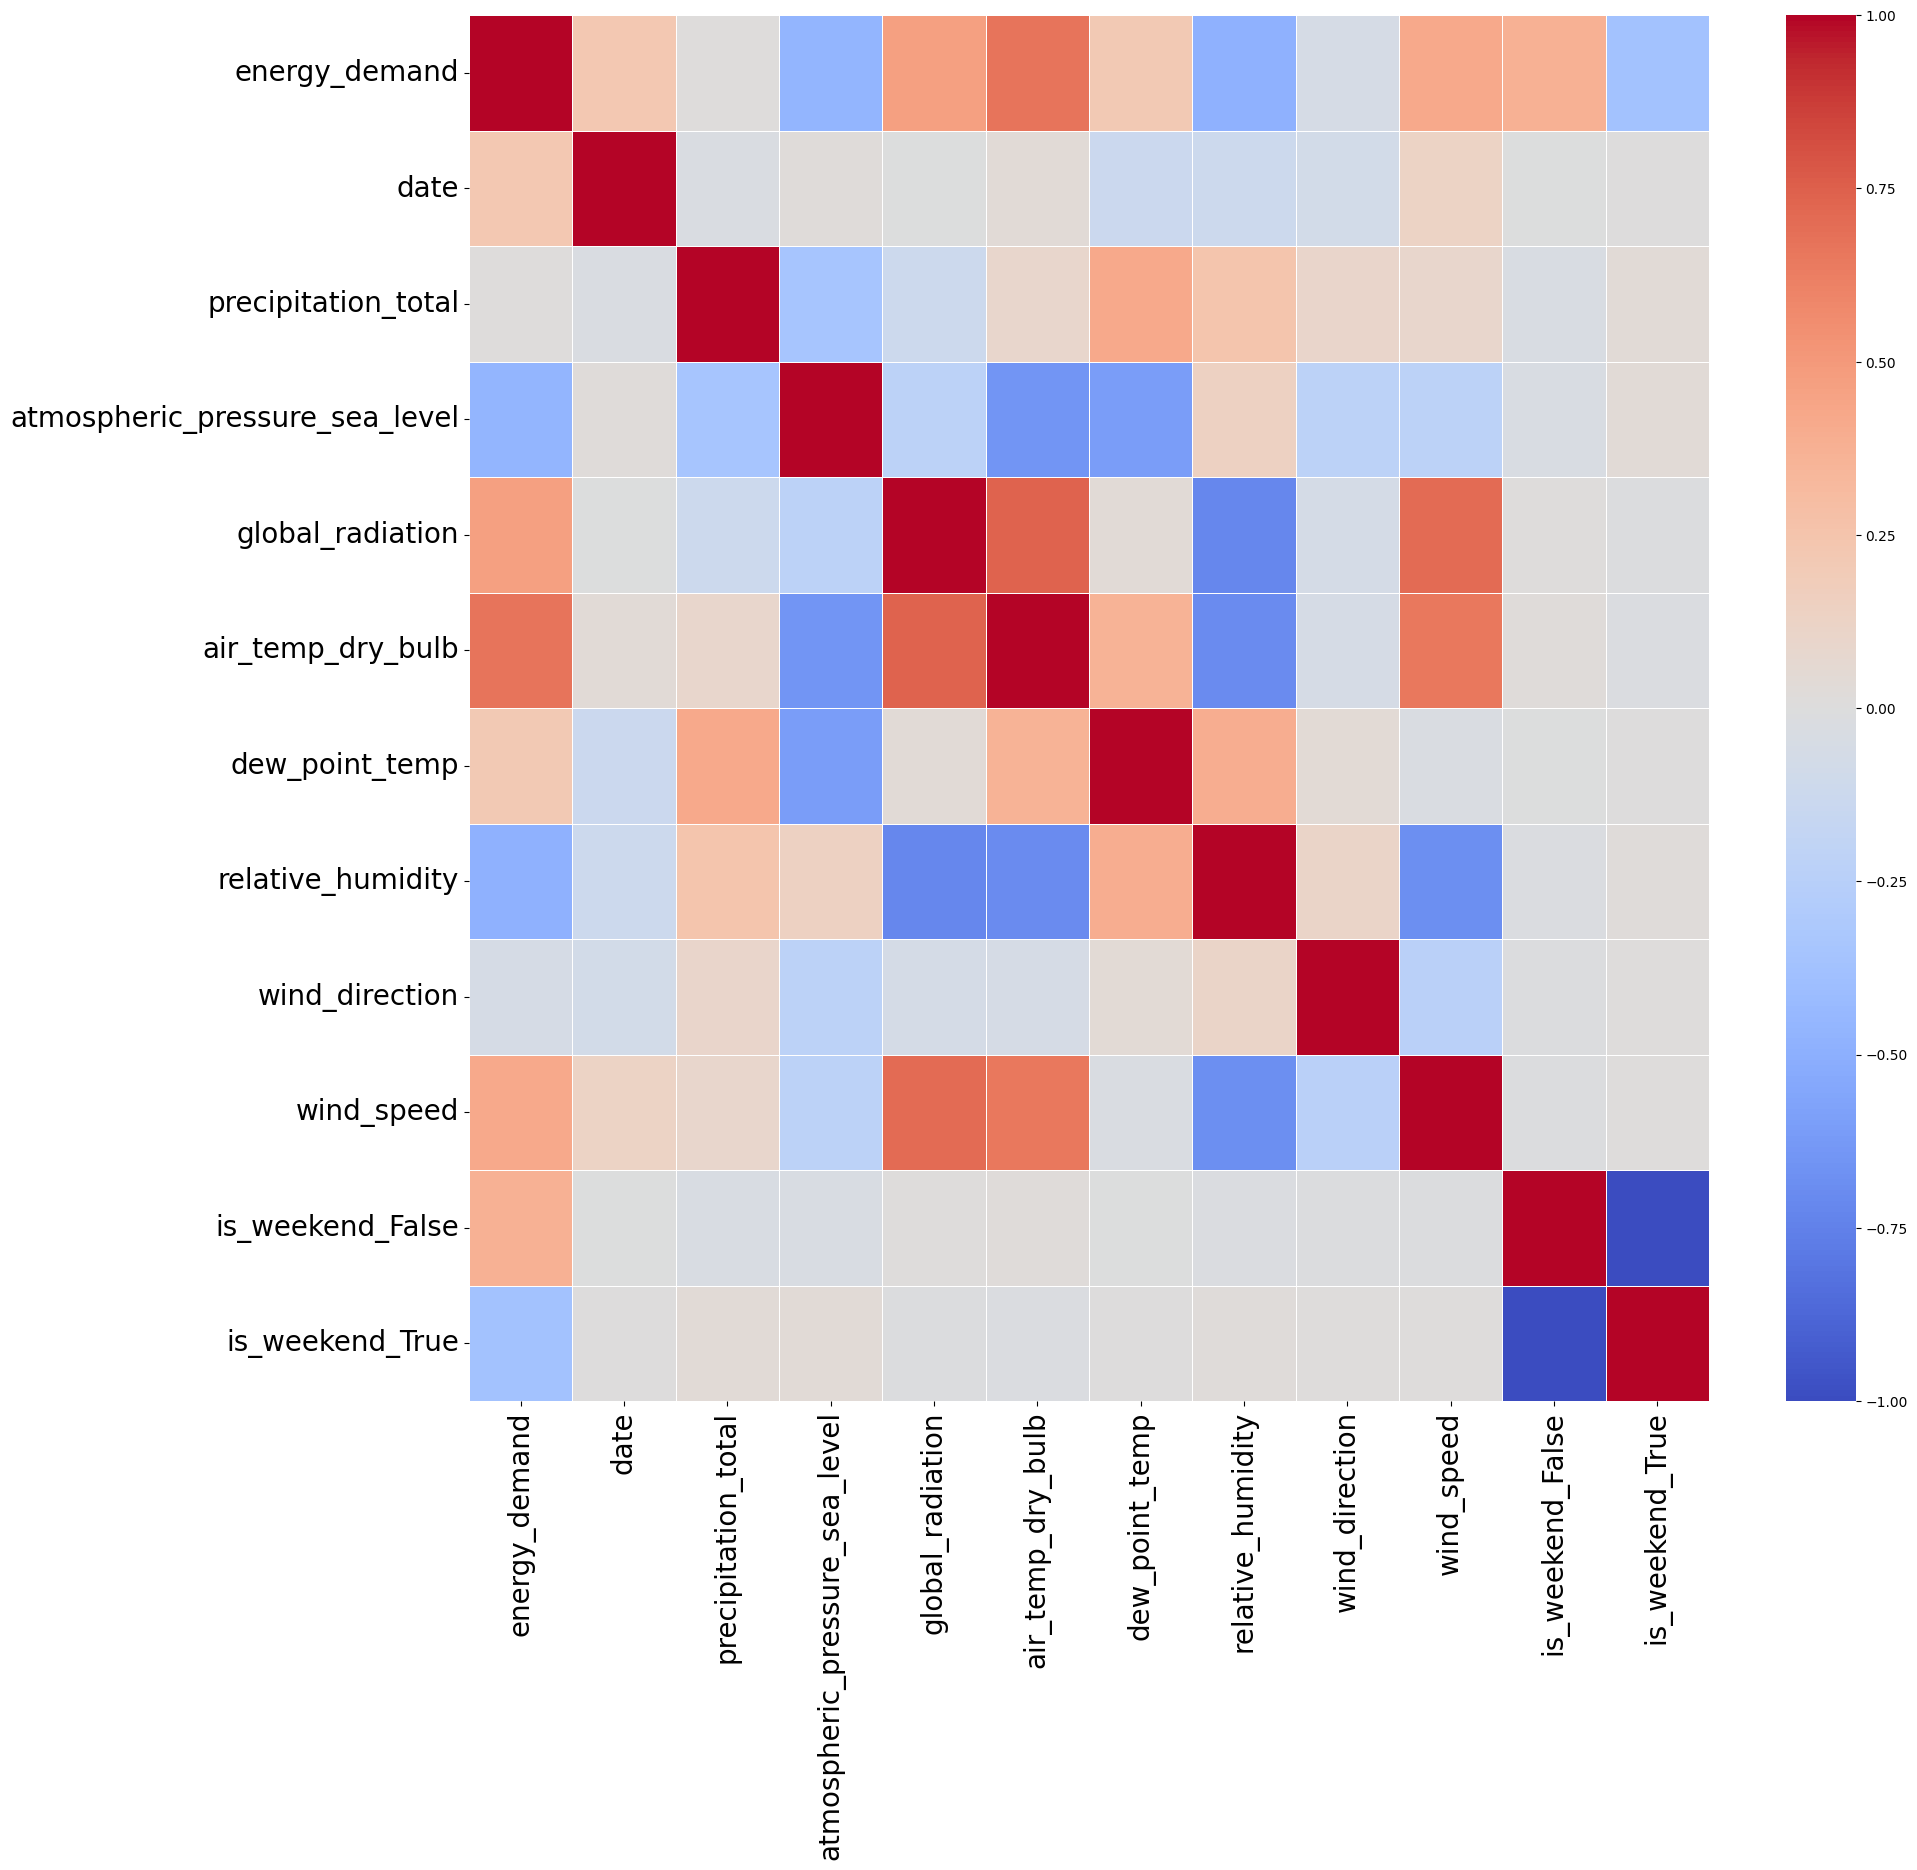

In [26]:
cols = df.columns.tolist()

cols.insert(0, cols.pop(cols.index('energy_demand')))
df = df[cols]

dummied = pd.get_dummies(df.copy().drop(['station_CPU_temp', 'atmospheric_pressure_station_level', 'atmospheric_pressure_max_prev_hour', 'atmospheric_pressure_min_prev_hour', 'max_temp_prev_hour', 'min_temp_prev_hour', 'max_dew_point_temp_prev_hour', 'min_dew_point_temp_prev_hour', 'max_relative_humidity_prev_hour', 'min_relative_humidity_prev_hour', 'wind_max_gust', 'station_battery_voltage'], axis = 1), columns = ['is_weekend'])
correlation = dummied.corr()
plt.figure(figsize=(20, 18))
matrix = sns.heatmap(correlation, cmap='coolwarm', annot=False, linewidths = 0.5)
plt.title('Correlation matrix after feature selection', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
figure = matrix.get_figure()
figure.savefig('../figures/corr_matrix_after_deletion.png', dpi = 400, bbox_inches='tight')
plt.show()

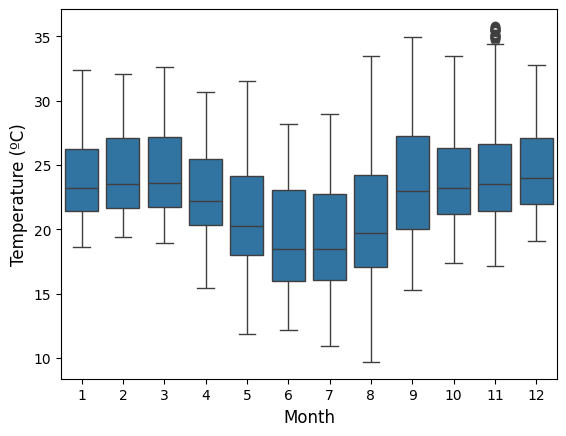

In [61]:
df_temp = df.copy()
df_temp['month'] = df_temp['date'].dt.month
temp_boxplot = sns.boxplot(df_temp, x = 'month', y = 'air_temp_dry_bulb')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (ºC)', fontsize=12)
plot = temp_boxplot.get_figure()
plot.savefig('../figures/temp_boxplot')

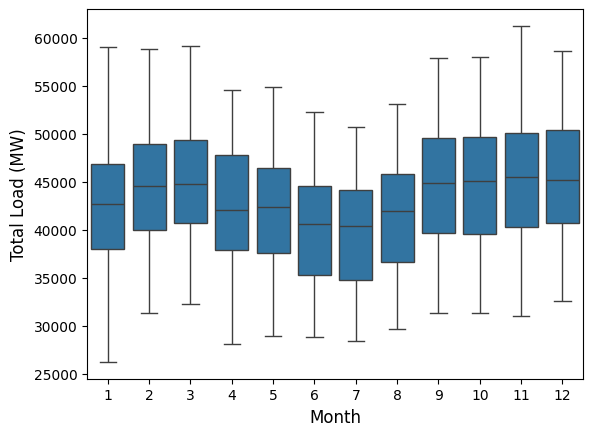

In [60]:
demand_boxplot = sns.boxplot(df_temp, x = 'month', y = 'energy_demand')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Load (MW)', fontsize=12)
plot = temp_boxplot.get_figure()
plot.savefig('../figures/demand_boxplot')

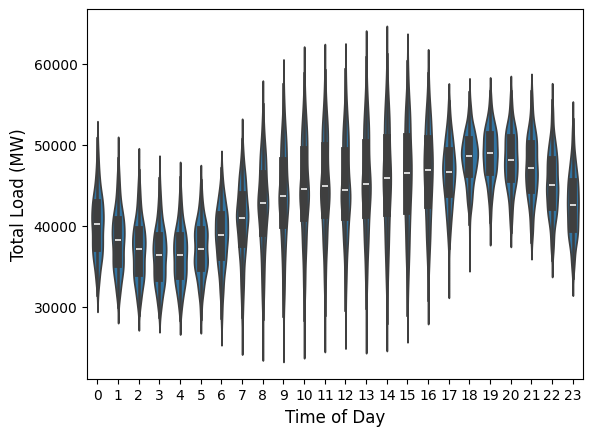

In [59]:
df_temp['time'] = df_temp['date'].dt.hour
hour_order = [str(h) for h in range(24)]

temp_violinplot = sns.violinplot(df_temp, x = 'time', y = 'energy_demand')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Total Load (MW)', fontsize=12)
plot = temp_violinplot.get_figure()
plot.savefig('../figures/energy_hour_violinplot')
plt.show()

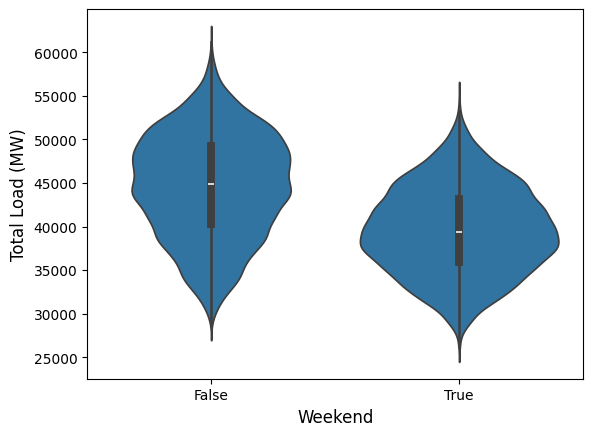

In [58]:
temp_violinplot = sns.violinplot(df_temp, x = 'is_weekend', y = 'energy_demand')
plt.xlabel('Weekend', fontsize=12)
plt.ylabel('Total Load (MW)', fontsize=12)
plot = temp_violinplot.get_figure()
plot.savefig('../figures/energy_weekend_violinplot')
plt.show()

In [62]:
dummied.to_csv('../data/clean/processed_met_data.csv', index = False)